## **Handling Missing Values**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/Churn_Modelling.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           9946 non-null   object 
 6   Age              9700 non-null   float64
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


#### **Gender** has 54 missing values
#### **Age** has 300 missing values

#### The second way of finding whether we have null values in the data is by using the isnull() function.

In [ ]:
print(df.isnull().sum())

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender              54
Age                300
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64


## Handling Missing Values

***1. Deleting the columns with missing data***

In [ ]:
updated_df = df.dropna(axis=1)

In [ ]:
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


The problem with this method is that we may lose valuable information on that feature, as we have deleted it completely due to some null values.

Should only be used if there are too many null values.

***2. Deleting the rows with missing data***

In [ ]:
updated_df = df.dropna(axis=0)

In [ ]:
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9662 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        9662 non-null   int64  
 1   CustomerId       9662 non-null   int64  
 2   Surname          9662 non-null   object 
 3   CreditScore      9662 non-null   int64  
 4   Geography        9662 non-null   object 
 5   Gender           9662 non-null   object 
 6   Age              9662 non-null   float64
 7   Tenure           9662 non-null   int64  
 8   Balance          9662 non-null   float64
 9   NumOfProducts    9662 non-null   int64  
 10  HasCrCard        9662 non-null   int64  
 11  IsActiveMember   9662 non-null   int64  
 12  EstimatedSalary  9662 non-null   float64
 13  Exited           9662 non-null   int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In this case, there are possibilities of getting better accuracy than before. This might be because the columns contains more valuable information than we expected.

***3. Filling the Missing Values – Imputation***

In this case, we will be filling the missing values with a certain number.

The possible ways to do this are:

- Filling the missing data with the mean or median value if it’s a numerical variable.
- Filling the missing data with mode if it’s a categorical value.
- Filling the numerical value with 0 or -999, or some other number that will not occur in the data. This can be done so that the machine can recognize that the data is not real or is different.
- Filling the categorical value with a new type for the missing values.

In [ ]:
df['Age'].mean()

38.89515463917526

In [ ]:
df['Age'].median()

37.0

In [ ]:
#fillna: fills the null records
#dropna: drops the null records

updated_df = df
updated_df['Age']=updated_df['Age'].fillna(df['Age'].mean())
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           9946 non-null   object 
 6   Age              10000 non-null  float64
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [ ]:
updated_df1 = df
updated_df1['Age']=updated_df['Age'].fillna(df['Age'].median())
updated_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           9946 non-null   object 
 6   Age              10000 non-null  float64
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


***4. Forward & Backward Filling – Imputation***

In [ ]:
df = pd.read_csv('/content/Churn_Modelling.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           9946 non-null   object 
 6   Age              9700 non-null   float64
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [ ]:
df1 = df

In [ ]:
df1['Age'] = df1['Age'].bfill()

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           9946 non-null   object 
 6   Age              10000 non-null  float64
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


## Feature Scalling

In [2]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Task-1 NORMALIZATION


In [11]:
new_df = pd.DataFrame(df,columns=['Tenure','Age'])
new_df

,Tenure,Age
0,2,42
1,1,41
2,8,42
3,1,39
4,2,43
...,...,...
9995,5,39
9996,10,35
9997,7,36
9998,3,42


In [9]:
new_df['Tenure'] = (new_df['Tenure'] - new_df['Tenure'].min()) / (new_df['Tenure'].max() - new_df['Tenure'].min())
new_df['Age'] = (new_df['Age'] - new_df['Age'].min()) / (new_df['Age'].max() - new_df['Age'].min())

In [10]:
new_df

,Tenure,Age
0,0.2,0.324324
1,0.1,0.310811
2,0.8,0.324324
3,0.1,0.283784
4,0.2,0.337838
...,...,...
9995,0.5,0.283784
9996,1.0,0.229730
9997,0.7,0.243243
9998,0.3,0.324324


### Task-2 STANDARDIZATION

In [14]:
new_df['Tenure'] = (new_df['Tenure'] - new_df['Tenure'].mean()) / new_df['Tenure'].std()
new_df['Age']  = (new_df['Age'] - new_df['Age'].mean()) / new_df['Age'].std()

In [15]:
new_df

,Tenure,Age
0,-1.041708,0.293503
1,-1.387468,0.198154
2,1.032856,0.293503
3,-1.387468,0.007456
4,-1.041708,0.388852
...,...,...
9995,-0.004426,0.007456
9996,1.724377,-0.373939
9997,0.687096,-0.278590
9998,-0.695947,0.293503


## Outlier Detection

In [20]:
df = pd.read_csv("https://raw.githubusercontent.com/pik1989/EDA/refs/heads/main/Data/raw_sales.csv")
df

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3
...,...,...,...,...,...
29575,2019-07-25 00:00:00,2900,500000,unit,3
29576,2019-07-25 00:00:00,2612,560000,unit,2
29577,2019-07-26 00:00:00,2912,464950,unit,2
29578,2019-07-26 00:00:00,2601,589000,unit,2


### 1. 3-Sigma Technique (Standard Deviation)

In this We consider a data point as anamoly if it lies outside the range [mean - 3*sd, mean+3*sd]

In [23]:
def find_anamolies(data):
    #define a list to accumlate anomalies
    anamolies = []

    data_mean = data.mean()
    data_std = data.std()

    cutoff = 3* data_std
    lower_limit  = data_mean - cutoff 
    upper_limit = data_mean + cutoff

    for outlier in data:
        if outlier > upper_limit or outlier < lower_limit:
            anamolies.append(outlier)

    return anamolies


In [24]:
len(find_anamolies(df['price']))

461

In [25]:
len(df['price'])

29580

In [26]:
df['price'].skew()

np.float64(4.312009366902367)

<Axes: ylabel='Density'>

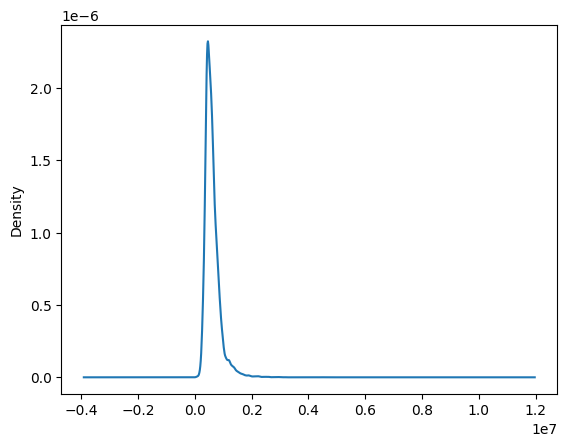

In [27]:
# Seems like our data is positively Skewed
df['price'].plot(kind = "kde")

In [29]:
df['price_transformed'] = np.log(df.price)

In [31]:
len(find_anamolies(df['price_transformed']))

266

<Axes: ylabel='Density'>

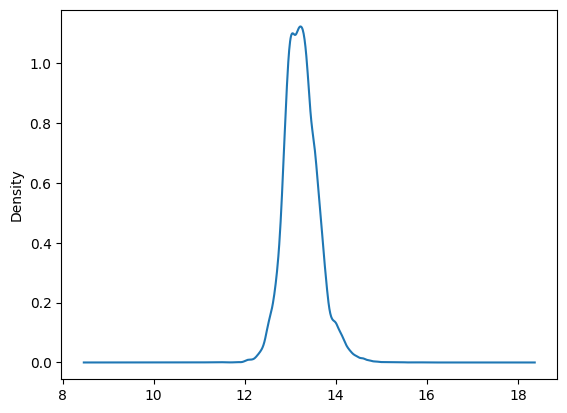

In [32]:
df['price_transformed'].plot(kind = "kde")

### 2. Boxplot

<Axes: >

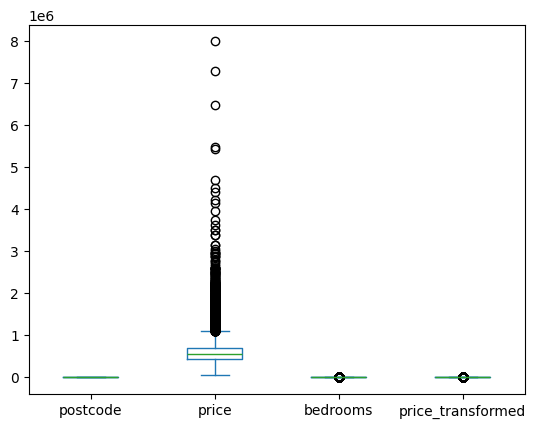

In [33]:
df.plot(kind = "box")

### Invalid Data or Data Type

- This include Treating data and make it fit for use, Analyzing each columns for invalid data, Out of range values, Extra info etc etc..
- 